In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter

# Part 1

In [2]:
G = nx.read_graphml('london.graph.xml')

In [3]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [4]:
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [5]:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [6]:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

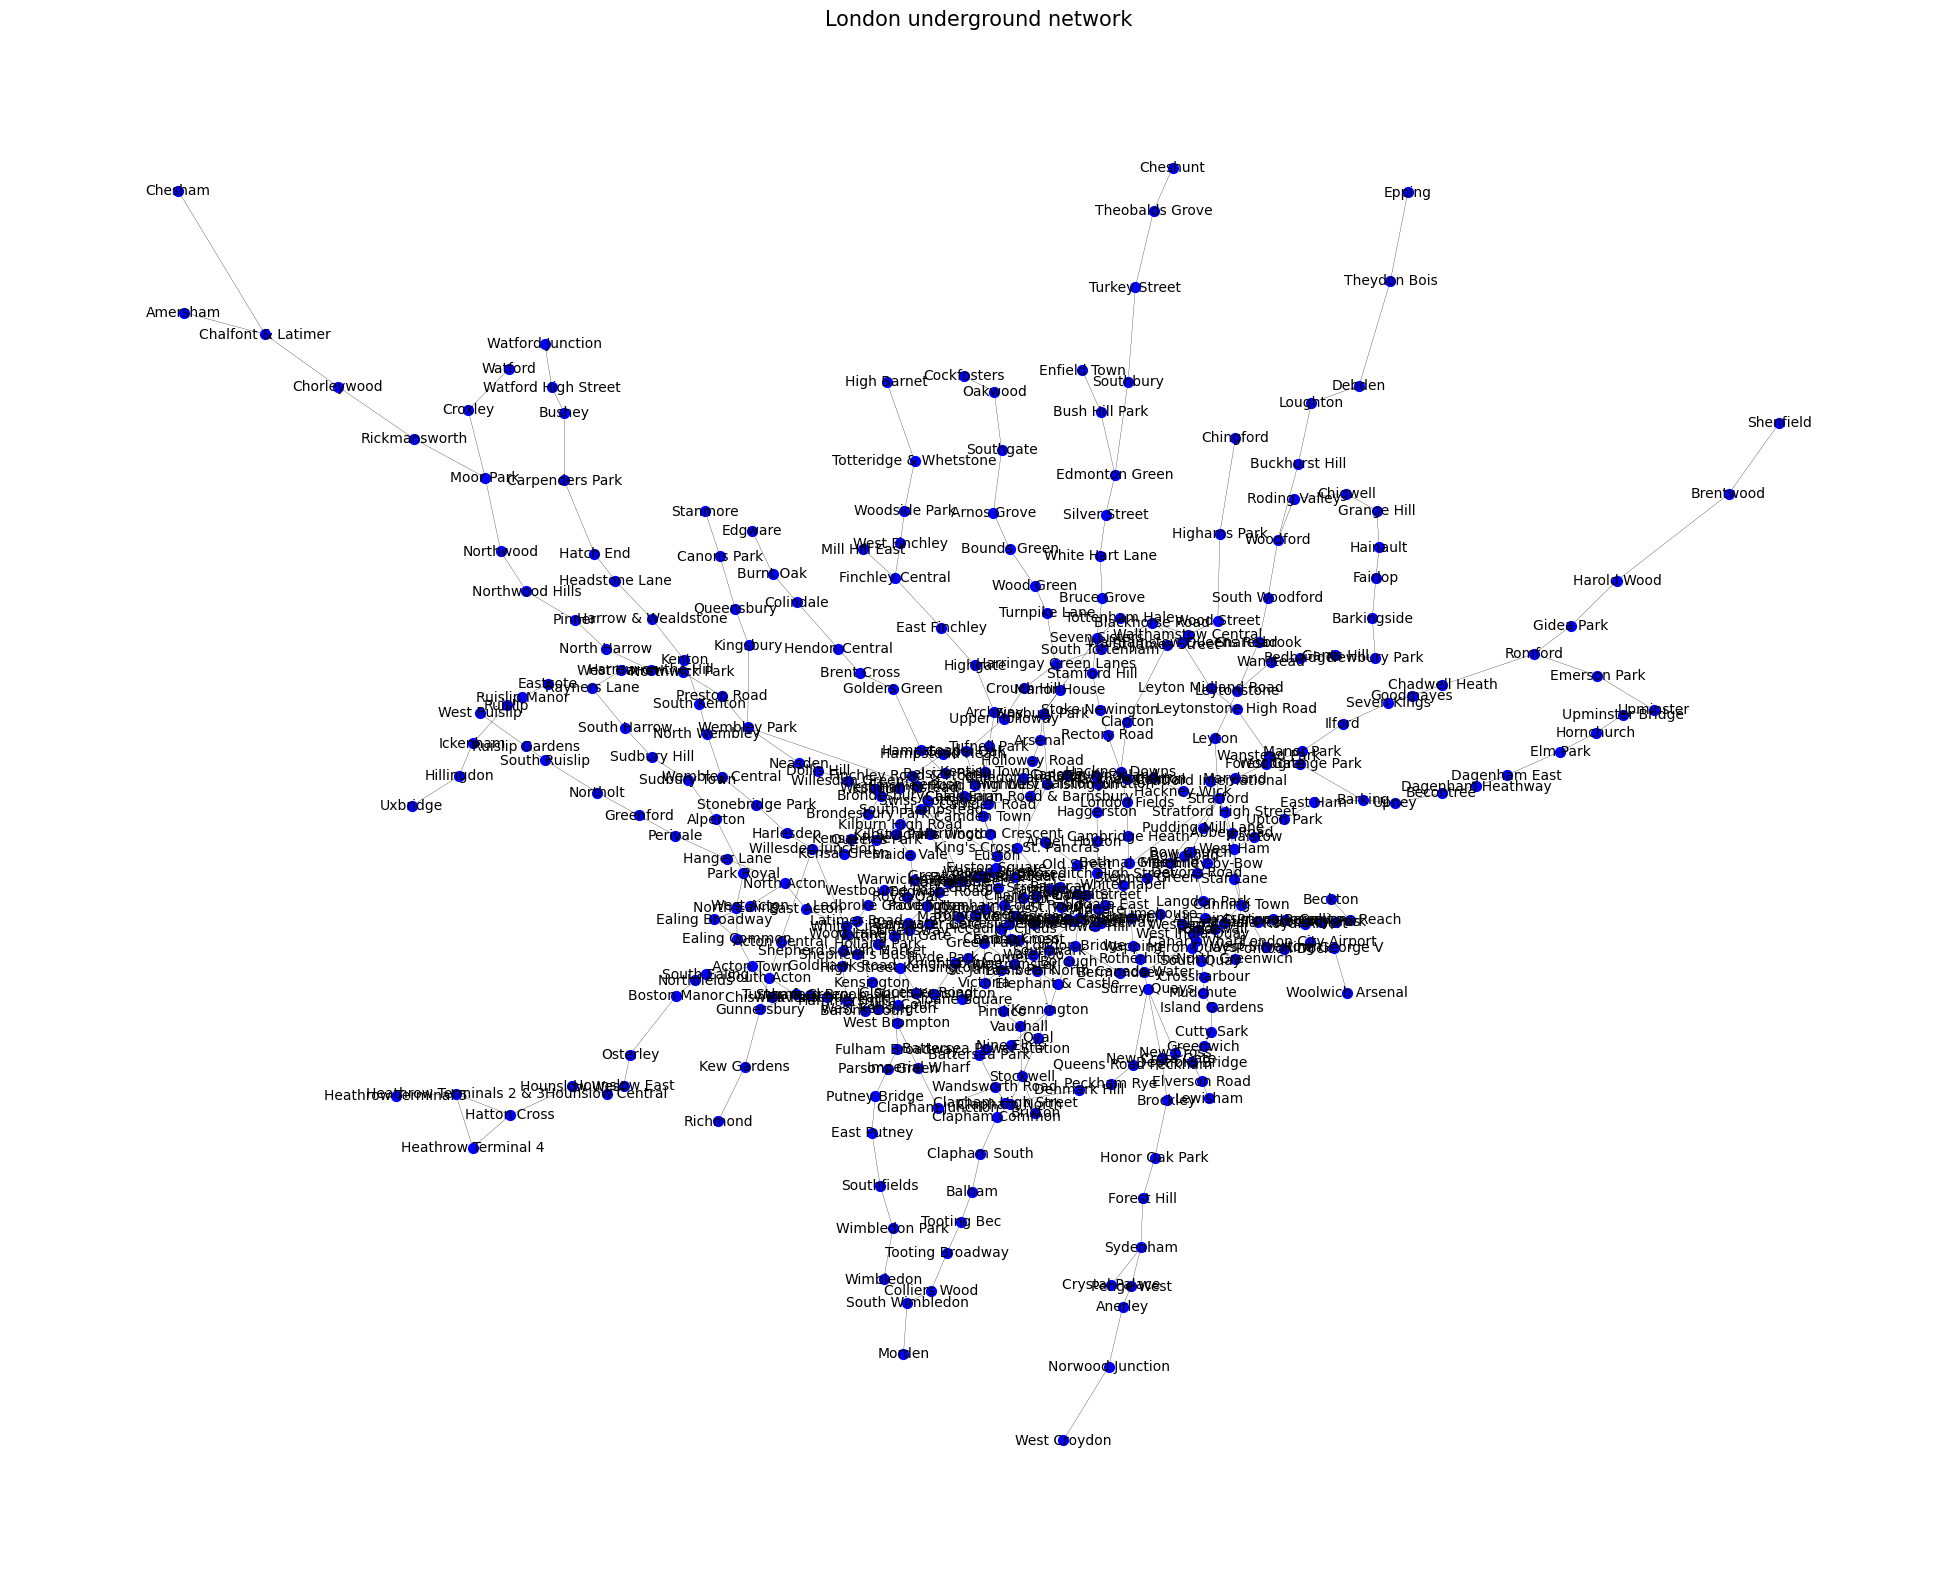

In [7]:
fig, ax = plt.subplots(figsize=(25,20))

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='b')
nx.draw_networkx_edges(G, pos, arrows=False, width=0.2)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title("London underground network",fontsize=15)
plt.axis("off")
plt.show()

In [8]:
print(nx.is_connected(G))

True


In [9]:
print(f'Number of connected components: {nx.number_connected_components(G)}')

components = nx.connected_components(G)
largest_component = max(components, key=len)
Largest_subgraph = G.subgraph(largest_component)
print(f'The the size of the largest component: {Largest_subgraph.number_of_nodes()}')
    
efficiency = nx.global_efficiency(G)
print(f'The global efficiency: {efficiency}')
    
clustering = nx.average_clustering(G)
print(f'The average clustering: {clustering}')

Number of connected components: 1
The the size of the largest component: 401
The global efficiency: 0.1012561935972123
The average clustering: 0.030382377389858693


## Centrality measure

In [10]:
deg_london = nx.degree_centrality(G)
nx.set_node_attributes(G, dict(deg_london), 'degree')

In [11]:
df = nx.to_pandas_edgelist(G)
df[0:10] 

,source,target,flows,length,line_name
0,Wembley Park,Kingsbury,12356,2916.771558,Jubilee
1,Wembley Park,Neasden,6744,2353.165938,Jubilee
2,Wembley Park,Preston Road,36601,1419.735166,Metropolitan
3,Wembley Park,Finchley Road,55216,7266.373927,Metropolitan
4,Kingsbury,Queensbury,9419,1245.995234,Jubilee
5,Queensbury,Canons Park,6385,1693.307343,Jubilee
6,Canons Park,Stanmore,3624,1419.669476,Jubilee
7,Stratford,West Ham,91801,1673.509515,Jubilee
8,Stratford,Mile End,12010,2805.001392,Central
9,Stratford,Leyton,56082,2131.342926,Central


In [12]:
df = pd.DataFrame(index = G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))
df_sorted = df.sort_values(["degree"], ascending=False)
deg_10 = df_sorted[0:10]
deg_10

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [13]:
deg_remove = list(deg_10.index.values)
deg_remove

['Stratford',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Baker Street',
 "Earl's Court",
 'Oxford Circus',
 'Liverpool Street',
 'Waterloo',
 'Green Park',
 'Canning Town']

In [14]:
deg_removenode = ['Before removal', 'Stratford','Bank and Monument', "King's Cross St. Pancras",'Baker Street', 
              "Earl's Court", 'Oxford Circus', 'Liverpool Street', 'Waterloo', 'Green Park', 'Canning Town']
deg_removenode 

['Before removal',
 'Stratford',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Baker Street',
 "Earl's Court",
 'Oxford Circus',
 'Liverpool Street',
 'Waterloo',
 'Green Park',
 'Canning Town']

In [15]:
deg_values = [(i[1]['degree']) for i in G.nodes(data=True)]
deg_values.sort(reverse=True)
deg_values = deg_values[0:10]
deg_values

[0.0225, 0.02, 0.0175, 0.0175, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015]

In [16]:
bet_london_top = nx.betweenness_centrality(G, normalized = False)
nx.set_node_attributes(G, bet_london_top, 'betweenness_top')

In [17]:
df = pd.DataFrame(index = G.nodes())
df['betweenness_top'] = pd.Series(nx.get_node_attributes(G, 'betweenness_top'))
df_sorted = df.sort_values(["betweenness_top"], ascending=False)
bet_10 = df_sorted[0:10]
bet_10

,betweenness_top
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


In [18]:
bet_remove = list(bet_10.index.values)
bet_remove

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [19]:
bet_removednode =['Before removal','Stratford','Bank and Monument', 'Liverpool Street',
                  "King's Cross St. Pancras", 'Waterloo','Green Park','Euston',
                  'Westminster', 'Baker Street','Finchley Road']
bet_removednode

['Before removal',
 'Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [20]:
bet_removednode

['Before removal',
 'Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [21]:
bet_values = [(i[1]['betweenness_top']) for i in G.nodes(data=True)]
bet_values.sort(reverse=True)
bet_values = bet_values[0:10]
bet_values

[23768.09343434341,
 23181.05894660899,
 21610.387049062047,
 20373.521464646434,
 19464.882323232327,
 17223.622113997128,
 16624.275468975477,
 16226.155916305914,
 15287.107611832655,
 13173.758008657984]

In [22]:
clos_top = nx.closeness_centrality(G)
nx.set_node_attributes(G, clos_top, 'closeness_top')

In [23]:
df = pd.DataFrame(index = G.nodes())
df['closeness_top'] = pd.Series(nx.get_node_attributes(G, 'closeness_top'))
df_sorted = df.sort_values(["closeness_top"], ascending=False)
clo_10 = df_sorted[0:10]
clo_10

,closeness_top
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


In [24]:
clo_remove = list(clo_10.index.values)
clo_remove

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

In [25]:
clo_removenode = ['Before removal','Green Park','Bank and Monument',"King's Cross St. Pancras",
              'Westminster','Waterloo','Oxford Circus','Bond Street','Farringdon','Angel','Moorgate']
clo_removenode

['Before removal',
 'Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

In [26]:
clo_values = [(i[1]['closeness_top']) for i in G.nodes(data=True)]
clo_values.sort(reverse=True)
clo_values = clo_values[0:10]
clo_values

[0.11477761836441894,
 0.1135718341851221,
 0.11344299489506524,
 0.11254924029262803,
 0.11226494527083918,
 0.11120378092855157,
 0.11098779134295228,
 0.11074197120708748,
 0.11074197120708748,
 0.11031439602868175]

In [27]:
def Lcc(g): #number of node in largest component
    x = max(nx.connected_components(g), key=len)
    Lcc = len(x)/401
    return Lcc

In [28]:
lcc = Lcc(G)
efficiency = nx.global_efficiency(G)
print('The largest connected component before nodes removal is ' + str(lcc))
print('The efficiency before nodes removalis ' + str(efficiency))

The largest connected component before nodes removal is 1.0
The efficiency before nodes removalis 0.1012561935972123


In [29]:
G1 = G.copy()
print(nx.info(G1))

Graph with 401 nodes and 467 edges


In [30]:
lcc_deg = []
efficiency_deg = []
lcc_deg.append(lcc)
efficiency_deg.append(efficiency)

In [31]:
for e in range(0,10):
    node_deg = [n for n in G1.nodes() if G1.nodes[n]['degree'] == deg_values[e]]
    print('Remove the node with the top {0} degree centrality'.format(e+1))

    for i in node_deg:
        G1.remove_nodes_from([i])
        lcc_count = Lcc(G1)
        efficiency_count = nx.global_efficiency(G1)
        lcc_deg.append(lcc_count)
        efficiency_deg.append(efficiency_count)
        print('The largest connected component is ' + str(lcc_count)+ 'after removal')
        print('The global efficiency is ' + str(efficiency_count)+ 'after removal')
lcc_deg = lcc_deg[0:11]
efficiency_deg = efficiency_deg[0:11]

Remove the node with the top 1 degree centrality
The largest connected component is 0.9451371571072319after removal
The global efficiency is 0.08891736066510689after removal
Remove the node with the top 2 degree centrality
The largest connected component is 0.942643391521197after removal
The global efficiency is 0.08586164448742485after removal
Remove the node with the top 3 degree centrality
The largest connected component is 0.940149625935162after removal
The global efficiency is 0.08203328759057034after removal
The largest connected component is 0.9326683291770573after removal
The global efficiency is 0.07570039409751211after removal
Remove the node with the top 4 degree centrality
Remove the node with the top 5 degree centrality
The largest connected component is 0.9251870324189526after removal
The global efficiency is 0.07302243396164704after removal
The largest connected component is 0.8877805486284289after removal
The global efficiency is 0.06893502024058405after removal
The lar

In [32]:
lcc_deg

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9326683291770573,
 0.9251870324189526,
 0.8877805486284289,
 0.885286783042394,
 0.8827930174563591,
 0.8778054862842892,
 0.8628428927680798]

In [33]:
efficiency_deg

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.08203328759057034,
 0.07570039409751211,
 0.07302243396164704,
 0.06893502024058405,
 0.06721932836875794,
 0.06622091057392582,
 0.06536196059296152,
 0.06373592086177943]

In [34]:
G2 = G.copy()
print(nx.info(G2))

Graph with 401 nodes and 467 edges


In [35]:
lcc_bet = []
efficiency_bet = []
lcc_bet.append(lcc)
efficiency_bet.append(efficiency)

In [36]:
for e in range(0,10):
    node_bet = [n for n in G2.nodes() if G2.nodes[n]['betweenness_top'] == bet_values[e]]
    print('Remove the node with the top {0} betweenness centrality'.format(e+1))

    for i in node_bet:
        G2.remove_nodes_from([i])
        lcc_count = Lcc(G2)
        efficiency_count = nx.global_efficiency(G2)
        lcc_bet.append(lcc_count)
        efficiency_bet.append(efficiency_count)
        print('The largest connected component is ' + str(lcc_count)+ 'after removal')
        print('The global efficiency is ' + str(efficiency_count)+ 'after removal')
lcc_bet = lcc_bet[0:11]
efficiency_bet = efficiency_bet[0:11]

Remove the node with the top 1 betweenness centrality
The largest connected component is 0.9451371571072319after removal
The global efficiency is 0.08891736066510689after removal
Remove the node with the top 2 betweenness centrality
The largest connected component is 0.942643391521197after removal
The global efficiency is 0.08586164448742485after removal
Remove the node with the top 3 betweenness centrality
The largest connected component is 0.940149625935162after removal
The global efficiency is 0.08496349266423939after removal
Remove the node with the top 4 betweenness centrality
The largest connected component is 0.9251870324189526after removal
The global efficiency is 0.07849775440713821after removal
Remove the node with the top 5 betweenness centrality
The largest connected component is 0.9226932668329177after removal
The global efficiency is 0.07594226578366223after removal
Remove the node with the top 6 betweenness centrality
The largest connected component is 0.9201995012468828

In [37]:
lcc_bet

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9251870324189526,
 0.9226932668329177,
 0.9201995012468828,
 0.8628428927680798,
 0.8603491271820449,
 0.8528678304239401,
 0.8453865336658354]

In [38]:
efficiency_bet

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.08496349266423939,
 0.07849775440713821,
 0.07594226578366223,
 0.07415154167648695,
 0.06820564659789057,
 0.06765950327361094,
 0.064700058053009,
 0.06313903700825897]

In [39]:
G3 = G.copy()
print(nx.info(G3))

Graph with 401 nodes and 467 edges


In [40]:
lcc_clo = []
efficiency_clo = []
lcc_clo.append(lcc)
efficiency_clo.append(efficiency)

In [41]:
for e in range(0,10):
    node_clo = [n for n in G3.nodes() if G3.nodes[n]['closeness_top'] == clo_values[e]]
    print('Remove the node with the top {0} closeness centrality'.format(e+1)) #e+1？

    for i in node_clo:
        G3.remove_nodes_from([i])
        lcc_count = Lcc(G3)
        efficiency_count = nx.global_efficiency(G3)
        lcc_clo.append(lcc_count)
        efficiency_clo.append(efficiency_count)
        print('The largest connected component is ' + str(lcc_count)+ 'after removal')
        print('The global efficiency is ' + str(efficiency_count)+ 'after removal')
lcc_clo = lcc_clo[0:11]
efficiency_clo = efficiency_clo[0:11]

Remove the node with the top 1 closeness centrality
The largest connected component is 0.9975062344139651after removal
The global efficiency is 0.09918991960788402after removal
Remove the node with the top 2 closeness centrality
The largest connected component is 0.9950124688279302after removal
The global efficiency is 0.09487232544791133after removal
Remove the node with the top 3 closeness centrality
The largest connected component is 0.9925187032418953after removal
The global efficiency is 0.08793385149140875after removal
Remove the node with the top 4 closeness centrality
The largest connected component is 0.9900249376558603after removal
The global efficiency is 0.08737164566976727after removal
Remove the node with the top 5 closeness centrality
The largest connected component is 0.9875311720698254after removal
The global efficiency is 0.08485943799789313after removal
Remove the node with the top 6 closeness centrality
The largest connected component is 0.9850374064837906after remo

In [42]:
lcc_clo

[1.0,
 0.9975062344139651,
 0.9950124688279302,
 0.9925187032418953,
 0.9900249376558603,
 0.9875311720698254,
 0.9850374064837906,
 0.9825436408977556,
 0.9800498753117207,
 0.9775561097256857,
 0.970074812967581]

In [43]:
efficiency_clo

[0.1012561935972123,
 0.09918991960788402,
 0.09487232544791133,
 0.08793385149140875,
 0.08737164566976727,
 0.08485943799789313,
 0.08278135073141742,
 0.08258086417012774,
 0.08260040537396239,
 0.08262233108950982,
 0.08166991436767818]

In [44]:
G4 = G.copy()
print(nx.info(G4))

Graph with 401 nodes and 467 edges


In [45]:
deg_removednode_seq=['Before removal']
lcc_deg_seq = []
efficiency_deg_seq = []
lcc_deg_seq.append(lcc)
efficiency_deg_seq.append(efficiency)

In [46]:
def removal(x):
    G4.remove_nodes_from(x)
    deg_removednode_seq.append(x)
    lcc = Lcc(G4)
    print(f'The the size of the largest component: {lcc}')
    lcc_deg_seq.append(lcc)
    efficiency = nx.global_efficiency(G4)
    print(f'The global efficiency: {efficiency}')
    efficiency_deg_seq.append(efficiency)
    return

In [47]:
deg_london = nx.degree_centrality(G4)
values_sorted_deg = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
node_1 = [e for e,v in values_sorted_deg[:1]]
print(f'Remove the station with the 1st degree centrality: {node_1}')
removal(node_1)

deg_london = nx.degree_centrality(G4)
values_sorted_deg = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
node_2 = [e for e,v in values_sorted_deg[:1]]
print(f'Remove the station with the 2nd degree centrality: {node_2}')
removal(node_2)

deg_london = nx.degree_centrality(G4)
values_sorted_deg = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
node_3 = [e for e,v in values_sorted_deg[:1]]
print(f'Remove the station with the 3rd degree centrality: { node_3 }')
removal(node_3)

deg_london = nx.degree_centrality(G4)
values_sorted_deg = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
node_4 = [e for e,v in values_sorted_deg[:1]]
print(f'Remove the station with the 4th degree centrality: { node_4 }')
removal(node_4)

deg_london = nx.degree_centrality(G4)
values_sorted_deg = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
node_5 = [e for e,v in values_sorted_deg[:1]]
print(f'Remove the station with the 5th degree centrality: { node_5 }')
removal(node_5)

deg_london = nx.degree_centrality(G4)
values_sorted_deg = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
node_6 = [e for e,v in values_sorted_deg[:1]]
print(f'Remove the station with the 6th degree centrality: { node_6 }')
removal(node_6)

deg_london = nx.degree_centrality(G4)
values_sorted_deg = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
node_7 = [e for e,v in values_sorted_deg[:1]]
print(f'Remove the station with the 7th degree centrality: { node_7 }')
removal(node_7)

deg_london = nx.degree_centrality(G4)
values_sorted_deg = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
node_8 = [e for e,v in values_sorted_deg[:1]]
print(f'Remove the station with the 8th degree centrality: { node_8 }')
removal(node_8)

deg_london = nx.degree_centrality(G4)
values_sorted_deg = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
node_9 = [e for e,v in values_sorted_deg[:1]]
print(f'Remove the station with the 9th degree centrality: { node_9 }')
removal(node_9)

deg_london = nx.degree_centrality(G4)
values_sorted_deg = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
node_10 = [e for e,v in values_sorted_deg[:1]]
print(f'Remove the station with the 10th degree centrality: { node_10 }')
removal(node_10)

Remove the station with the 1st degree centrality: ['Stratford']
The the size of the largest component: 0.9451371571072319
The global efficiency: 0.08891736066510689
Remove the station with the 2nd degree centrality: ['Bank and Monument']
The the size of the largest component: 0.942643391521197
The global efficiency: 0.08586164448742485
Remove the station with the 3rd degree centrality: ['Baker Street']
The the size of the largest component: 0.940149625935162
The global efficiency: 0.08203328759057034
Remove the station with the 4th degree centrality: ["King's Cross St. Pancras"]
The the size of the largest component: 0.9326683291770573
The global efficiency: 0.07570039409751211
Remove the station with the 5th degree centrality: ['Canning Town']
The the size of the largest component: 0.8977556109725686
The global efficiency: 0.07039592695635104
Remove the station with the 6th degree centrality: ['Green Park']
The the size of the largest component: 0.8952618453865336
The global efficien

In [48]:
deg_removednode_seq = ['Before removal',
 'Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'Canning Town',
 'Green Park',
 "Earl's Court",
 'Waterloo',
 'Oxford Circus',
 'Willesden Junction']

In [49]:
lcc_deg_seq

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9326683291770573,
 0.8977556109725686,
 0.8952618453865336,
 0.8927680798004988,
 0.8902743142144638,
 0.885286783042394,
 0.8503740648379052]

In [50]:
efficiency_deg_seq

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.08203328759057034,
 0.07570039409751211,
 0.07039592695635104,
 0.06940235301523284,
 0.0677717604548151,
 0.06593580277595987,
 0.06506900122239155,
 0.056747518813518014]

In [51]:
G5 = G.copy()
print(nx.info(G5))

Graph with 401 nodes and 467 edges


In [52]:
bet_removednode_seq=['Before removal']
lcc_bet_seq = []
efficiency_bet_seq = []
lcc_bet_seq.append(lcc)
efficiency_bet_seq.append(efficiency)

In [53]:
def removal(x):
    G5.remove_nodes_from(x)
    bet_removednode_seq.append(x)
    lcc = Lcc(G5)
    print(f'The the size of the largest component: {lcc}')
    lcc_bet_seq.append(lcc)
    efficiency = nx.global_efficiency(G5)
    print(f'The global efficiency: {efficiency}')
    efficiency_bet_seq.append(efficiency)
    return

In [54]:
bet_london = nx.betweenness_centrality(G5, normalized = False)
values_sorted_bet = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
node_1 = [e for e,v in values_sorted_bet[:1]]
print(f'Remove the station with the 1st betweenness centrality: {node_1}')
removal(node_1)

bet_london = nx.betweenness_centrality(G5, normalized = False)
values_sorted_bet = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
node_2 = [e for e,v in values_sorted_bet[:1]]
print(f'Remove the station with the 2nd betweenness centrality: {node_2}')
removal(node_2)

bet_london = nx.betweenness_centrality(G5, normalized = False)
values_sorted_bet = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
node_3 = [e for e,v in values_sorted_bet[:1]]
print(f'Remove the station with the 3rd betweenness centrality: { node_3 }')
removal(node_3)

bet_london = nx.betweenness_centrality(G5, normalized = False)
values_sorted_bet = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
node_4 = [e for e,v in values_sorted_bet[:1]]
print(f'Remove the station with the 4th betweenness centrality: { node_4 }')
removal(node_4)

bet_london = nx.betweenness_centrality(G5, normalized = False)
values_sorted_bet = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
node_5 = [e for e,v in values_sorted_bet[:1]]
print(f'Remove the station with the 5th betweenness centrality: { node_5 }')
removal(node_5)

bet_london = nx.betweenness_centrality(G5, normalized = False)
values_sorted_bet = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
node_6 = [e for e,v in values_sorted_bet[:1]]
print(f'Remove the station with the 6th betweenness centrality: { node_6 }')
removal(node_6)

bet_london = nx.betweenness_centrality(G5, normalized = False)
values_sorted_bet = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
node_7 = [e for e,v in values_sorted_bet[:1]]
print(f'Remove the station with the 7th betweenness centrality: { node_7 }')
removal(node_7)

bet_london = nx.betweenness_centrality(G5, normalized = False)
values_sorted_bet = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
node_8 = [e for e,v in values_sorted_bet[:1]]
print(f'Remove the station with the 8th betweenness centrality: { node_8 }')
removal(node_8)

bet_london = nx.betweenness_centrality(G5, normalized = False)
values_sorted_bet = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
node_9 = [e for e,v in values_sorted_bet[:1]]
print(f'Remove the station with the 9th betweenness centrality: { node_9 }')
removal(node_9)

bet_london = nx.betweenness_centrality(G5, normalized = False)
values_sorted_bet = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
node_10 = [e for e,v in values_sorted_bet[:1]]
print(f'Remove the station with the 10th betweenness centrality: { node_10 }')
removal(node_10)

Remove the station with the 1st betweenness centrality: ['Stratford']
The the size of the largest component: 0.9451371571072319
The global efficiency: 0.08891736066510689
Remove the station with the 2nd betweenness centrality: ["King's Cross St. Pancras"]
The the size of the largest component: 0.942643391521197
The global efficiency: 0.08460293133575152
Remove the station with the 3rd betweenness centrality: ['Waterloo']
The the size of the largest component: 0.940149625935162
The global efficiency: 0.08182895253292936
Remove the station with the 4th betweenness centrality: ['Bank and Monument']
The the size of the largest component: 0.9376558603491272
The global efficiency: 0.07767794342812263
Remove the station with the 5th betweenness centrality: ['Canada Water']
The the size of the largest component: 0.9351620947630923
The global efficiency: 0.07283234083472483
Remove the station with the 6th betweenness centrality: ['West Hampstead']
The the size of the largest component: 0.566084

In [55]:
lcc_bet_seq

[1.0,
 0.9451371571072319,
 0.942643391521197,
 0.940149625935162,
 0.9376558603491272,
 0.9351620947630923,
 0.5660847880299252,
 0.5635910224438903,
 0.48877805486284287,
 0.4314214463840399,
 0.4239401496259352]

In [56]:
efficiency_bet_seq

[0.1012561935972123,
 0.08891736066510689,
 0.08460293133575152,
 0.08182895253292936,
 0.07767794342812263,
 0.07283234083472483,
 0.053210203984026455,
 0.05165629952389727,
 0.0458442134055722,
 0.04163076968121037,
 0.0381637040943985]

In [57]:
bet_removednode_seq = ['Before removal',
 'Stratford',
 "King's Cross St. Pancras",
 'Waterloo',
 'Bank and Monument',
 'Canada Water',
 'West Hampstead',
 "Earl's Court",
 "Shepherd's Bush",
 'Euston',
 'Baker Street']

In [58]:
G6 = G.copy()
print(nx.info(G6))

Graph with 401 nodes and 467 edges


In [59]:
clo_removednode_seq=['Before removal']
lcc_clo_seq = []
efficiency_clo_seq = []
lcc_clo_seq.append(lcc)
efficiency_clo_seq.append(efficiency)

In [60]:
def removal(x):
    G6.remove_nodes_from(x)
    clo_removednode_seq.append(x)
    lcc = Lcc(G6)
    print(f'The the size of the largest component: {lcc}')
    lcc_clo_seq.append(lcc)
    efficiency = nx.global_efficiency(G6)
    print(f'The global efficiency: {efficiency}')
    efficiency_clo_seq.append(efficiency)
    return

In [61]:
closs_london = nx.closeness_centrality(G6)
values_sorted_closs = sorted(closs_london.items(), key=itemgetter(1), reverse=True)
node_1 = [e for e,v in values_sorted_closs[:1]]
print(f'Remove the station with the 1st closeness centrality: {node_1}')
removal(node_1)

closs_london = nx.closeness_centrality(G6)
values_sorted_closs = sorted(closs_london.items(), key=itemgetter(1), reverse=True)
node_2 = [e for e,v in values_sorted_closs[:1]]
print(f'Remove the station with the 2nd closeness centrality: {node_2}')
removal(node_2)

closs_london = nx.closeness_centrality(G6)
values_sorted_closs = sorted(closs_london.items(), key=itemgetter(1), reverse=True)
node_3 = [e for e,v in values_sorted_closs[:1]]
print(f'Remove the station with the 3rd closeness centrality: { node_3 }')
removal(node_3)

closs_london = nx.closeness_centrality(G6)
values_sorted_closs = sorted(closs_london.items(), key=itemgetter(1), reverse=True)
node_4 = [e for e,v in values_sorted_closs[:1]]
print(f'Remove the station with the 4th closeness centrality: { node_4 }')
removal(node_4)

closs_london = nx.closeness_centrality(G6)
values_sorted_closs = sorted(closs_london.items(), key=itemgetter(1), reverse=True)
node_5 = [e for e,v in values_sorted_closs[:1]]
print(f'Remove the station with the 5th closeness centrality: { node_5 }')
removal(node_5)

closs_london = nx.closeness_centrality(G6)
values_sorted_closs = sorted(closs_london.items(), key=itemgetter(1), reverse=True)
node_6 = [e for e,v in values_sorted_closs[:1]]
print(f'Remove the station with the 6th closeness centrality: { node_6 }')
removal(node_6)

closs_london = nx.closeness_centrality(G6)
values_sorted_closs = sorted(closs_london.items(), key=itemgetter(1), reverse=True)
node_7 = [e for e,v in values_sorted_closs[:1]]
print(f'Remove the station with the 7th closeness centrality: { node_7 }')
removal(node_7)

closs_london = nx.closeness_centrality(G6)
values_sorted_closs = sorted(closs_london.items(), key=itemgetter(1), reverse=True)
node_8 = [e for e,v in values_sorted_closs[:1]]
print(f'Remove the station with the 8th closeness centrality: { node_8 }')
removal(node_8)

closs_london = nx.closeness_centrality(G6)
values_sorted_closs = sorted(closs_london.items(), key=itemgetter(1), reverse=True)
node_9 = [e for e,v in values_sorted_closs[:1]]
print(f'Remove the station with the 9th closeness centrality: { node_9 }')
removal(node_9)

closs_london = nx.closeness_centrality(G6)
values_sorted_closs = sorted(closs_london.items(), key=itemgetter(1), reverse=True)
node_10 = [e for e,v in values_sorted_closs[:1]]
print(f'Remove the station with the 10th closeness centrality: { node_10 }')
removal(node_10)

Remove the station with the 1st closeness centrality: ['Green Park']
The the size of the largest component: 0.9975062344139651
The global efficiency: 0.09918991960788402
Remove the station with the 2nd closeness centrality: ["King's Cross St. Pancras"]
The the size of the largest component: 0.9950124688279302
The global efficiency: 0.09443475025566316
Remove the station with the 3rd closeness centrality: ['Waterloo']
The the size of the largest component: 0.9925187032418953
The global efficiency: 0.09181648060183005
Remove the station with the 4th closeness centrality: ['Bank and Monument']
The the size of the largest component: 0.9900249376558603
The global efficiency: 0.08542563066911478
Remove the station with the 5th closeness centrality: ['West Hampstead']
The the size of the largest component: 0.9875311720698254
The global efficiency: 0.08054424756502003
Remove the station with the 6th closeness centrality: ['Canada Water']
The the size of the largest component: 0.563591022443890

In [62]:
clo_removednode_seq = ['Before removal','Green Park',"King's Cross St. Pancras",
 'Waterloo',
 'Bank and Monument',
 'West Hampstead',
 'Canada Water',
 'Stratford',
 "Earl's Court",
 "Shepherd's Bush",
 'Oxford Circus']

In [63]:
lcc_clo_seq

[1.0,
 0.9975062344139651,
 0.9950124688279302,
 0.9925187032418953,
 0.9900249376558603,
 0.9875311720698254,
 0.5635910224438903,
 0.5635910224438903,
 0.5610972568578554,
 0.486284289276808,
 0.4837905236907731]

In [64]:
efficiency_clo_seq

[0.1012561935972123,
 0.09918991960788402,
 0.09443475025566316,
 0.09181648060183005,
 0.08542563066911478,
 0.08054424756502003,
 0.05810104159173278,
 0.051883620553389555,
 0.05035000093626794,
 0.04439458727102797,
 0.04295771061337044]

In [65]:
lcc_deg_re = [i/10 for i in lcc_deg]
lcc_deg_seq_re =[i/10 for i in lcc_deg_seq]
lcc_bet_re = [i/10 for i in lcc_bet]
lcc_bet_seq_re =[i/10 for i in lcc_bet_seq]
lcc_clo_re = [i/10 for i in lcc_clo]
lcc_clo_seq_re =[i/10 for i in lcc_clo_seq]

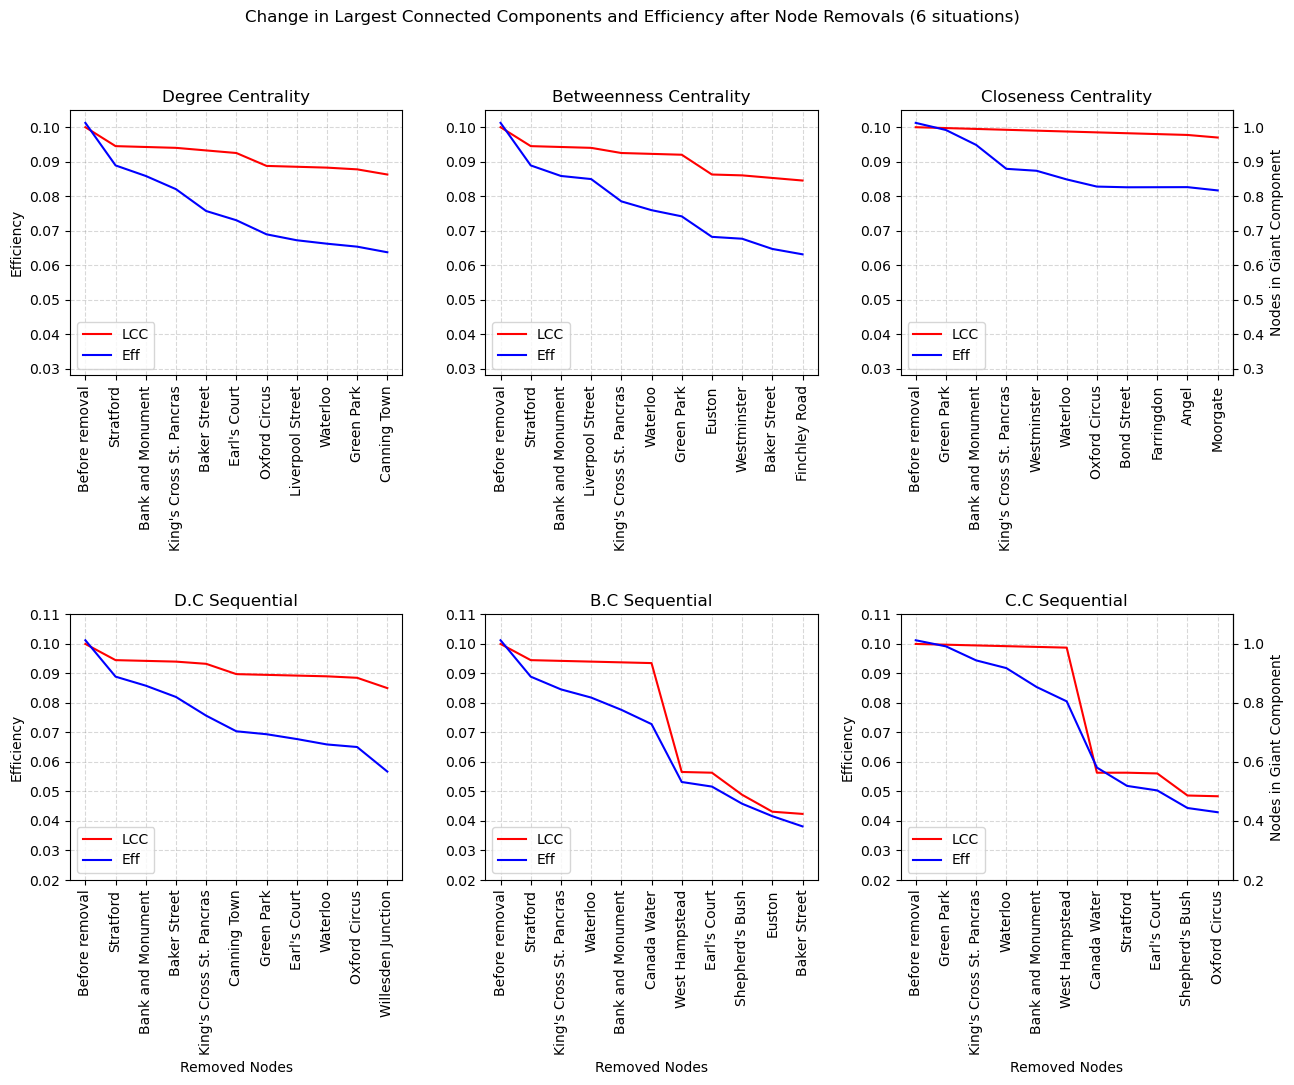

In [66]:
# Betweenness Centrality Plot

fig, ax = plt.subplots(2,3,figsize=(15,10))
fig.suptitle("Change in Largest Connected Components and Efficiency after Node Removals (6 situations)")
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[0,2]
ax4 = ax[1,0]
ax5 = ax[1,1]
ax6 = ax[1,2]

ax1.plot(lcc_deg_re, color = "red", label = 'LCC',) #rang(0:10),
ax1.plot(efficiency_deg, color = "blue", label = 'Eff')#rang(0:10),
ax1.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
#ax1.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
ax1.set_ylabel("Efficiency")   #plt.ylabel("Values")
ax1.set_ylim(0.028,0.105)
#secax1 = ax1.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
#secax1.set_ylabel("Nodes in Giant Component")
ax1.set_xticks(list(range(0,11)))
ax1.set_xticklabels(deg_removenode, rotation=90)# plt.xlabel("Removed node")
ax1.legend(loc=3) #'upper left' 'best'
ax1.set_title('Degree Centrality')

ax2.plot(lcc_bet_re, color = "red", label = 'LCC',) #rang(0:10),
ax2.plot(efficiency_bet, color = "blue", label = 'Eff')#rang(0:10),
ax2.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
#ax2.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
#ax2.set_ylabel("Efficiency")   #plt.ylabel("Values")
ax2.set_ylim(0.028,0.105)
#secax2 = ax2.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
#secax2.set_ylabel("Nodes in Giant Component")
ax2.set_xticks(list(range(0,11)))
ax2.set_xticklabels(bet_removednode, rotation=90)# plt.xlabel("Removed node")
ax2.legend(loc=3) #'upper left' 'best'
ax2.set_title('Betweenness Centrality')

ax3.plot(lcc_clo_re, color = "red", label = 'LCC',) #rang(0:10),
ax3.plot(efficiency_clo, color = "blue", label = 'Eff')#rang(0:10),
ax3.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
#ax2.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
#ax2.set_ylabel("Efficiency")   #plt.ylabel("Values")
ax3.set_ylim(0.028,0.105)
secax3 = ax3.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
secax3.set_ylabel("Nodes in Giant Component")
ax3.set_xticks(list(range(0,11)))
ax3.set_xticklabels(clo_removenode, rotation=90)# plt.xlabel("Removed node")
ax3.legend(loc=3) #'upper left' 'best'
ax3.set_title('Closeness Centrality')


#Sequential
ax4.plot(lcc_deg_seq_re, color = "red", label = 'LCC',) #rang(0:10),
ax4.plot(efficiency_deg_seq, color = "blue", label = 'Eff')#rang(0:10),
ax4.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
ax4.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
ax4.set_ylabel("Efficiency")   #plt.ylabel("Values")
ax4.set_ylim(0.02,0.11)
#secax4 = ax4.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
#secax4.set_ylabel("Nodes in Giant Component")
ax4.set_xticks(list(range(0,11)))
ax4.set_xticklabels(deg_removednode_seq, rotation=90)# plt.xlabel("Removed node")
ax4.legend(loc=3) #'upper left' 'best'
ax4.set_title('D.C Sequential')

ax5.plot(lcc_bet_seq_re, color = "red", label = 'LCC',) #rang(0:10),
ax5.plot(efficiency_bet_seq, color = "blue", label = 'Eff')#rang(0:10),
ax5.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
ax5.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
#ax5.set_ylabel("Efficiency")   #plt.ylabel("Values")
ax5.set_ylim(0.02,0.11)
#secax4 = ax4.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
#secax4.set_ylabel("Nodes in Giant Component")
ax5.set_xticks(list(range(0,11)))
ax5.set_xticklabels(bet_removednode_seq, rotation=90)# plt.xlabel("Removed node")
ax5.legend(loc=3) #'upper left' 'best'
ax5.set_title('B.C Sequential')

ax6.plot(lcc_clo_seq_re, color = "red", label = 'LCC',) #rang(0:10),
ax6.plot(efficiency_clo_seq, color = "blue", label = 'Eff')#rang(0:10),
ax6.grid(color='grey', linestyle='--',alpha=0.3) #, linewidth=1
ax6.set_xlabel("Removed Nodes") # plt.xlabel("Removed node")
ax6.set_ylabel("Efficiency")   #plt.ylabel("Values")
ax6.set_ylim(0.02,0.11)
secax6 = ax6.secondary_yaxis("right", functions=(lambda x: 10*x, lambda x: 10*x))
secax6.set_ylabel("Nodes in Giant Component")
ax6.set_xticks(list(range(0,11)))
ax6.set_xticklabels(clo_removednode_seq, rotation=90)# plt.xlabel("Removed node")
ax6.legend(loc=3) #'upper left' 'best'
ax6.set_title('C.C Sequential')

fig.subplots_adjust(wspace=0.25,hspace=0.9)
plt.show()
fig.savefig('Comparision of 6 nodes removal situations ')

## Weighted network (flow = weight)

In [67]:
bet_london_w = nx.betweenness_centrality(G, weight='flows', normalized=False)
nx.set_node_attributes(G, bet_london_w, 'betweenness_w')
df = pd.DataFrame(index = G.nodes())
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))
df_sorted = df.sort_values(["betweenness_w"], ascending=False)
bet_w_10 = df_sorted[0:10]
bet_w_10

,betweenness_w
West Hampstead,28401.50
Gospel Oak,21947.00
Finchley Road & Frognal,21446.00
Hampstead Heath,21372.00
Willesden Junction,19166.50
Leicester Square,17097.75
Brondesbury,16526.00
Brondesbury Park,16411.50
Kensal Rise,16299.75
Blackhorse Road,16091.75


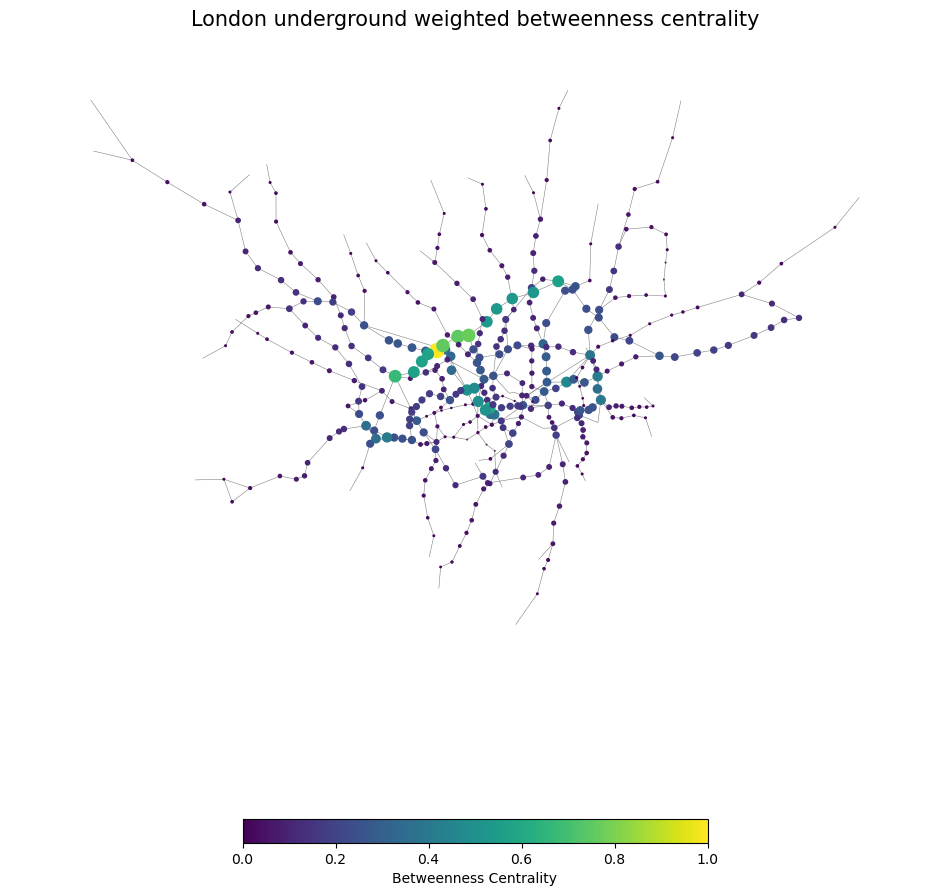

In [68]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values = [(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color = [(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size = [(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos = pos

fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos, edge_color='gray', 
        width=0.4)
nod = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = bet_w_color,
        node_size = bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground weighted betweenness centrality",fontsize=15)
plt.show()

In [69]:
G7 = G.copy()

In [70]:
lengths = nx.single_source_dijkstra_path_length(G7, node, weight = 'flows')
lengths = lengths.values()
plt.hist(lengths)

(array([ 33.,  85., 121.,  67.,  59.,  15.,  10.,   5.,   2.,   4.]),
 array([     0. ,  63236.9, 126473.8, 189710.7, 252947.6, 316184.5,
        379421.4, 442658.3, 505895.2, 569132.1, 632369. ]),
 <BarContainer object of 10 artists>)

In [71]:
inv_lengths = []
inv = [(1/x) for x in lengths if x is not 0]
inv_lengths.extend(inv)
L = sum(inv_lengths)
N = len(G7)

In [72]:
E1 = L / (N*(N-1))
E1

1.893567655532809e-08

In [73]:
sum_ideal_sp = (1/126473.8) * 401
sum_ideal_sp

0.0031706171554899115

In [74]:
E_ideal = sum_ideal_sp / (N*(N-1))
E_ideal

1.9766939872131617e-08

In [75]:
E_orig = E1/E_ideal
E_orig

0.9579467878093015

In [76]:
clustering_weighted = nx.average_clustering(G7, weight = 'flows')
print(f'The average clustering before removal: {clustering_weighted}')

The average clustering before removal: 0.0015791877116043108


In [77]:
bet_london = nx.betweenness_centrality(G7, normalized = False)
values_sorted_bet = sorted(bet_london.items(), key=itemgetter(1), reverse=True)
node_1 = [e for e,v in values_sorted_bet[:1]]
print(f'Remove the station with the 1st betweenness centrality: {node_1}')

Remove the station with the 1st betweenness centrality: ['Stratford']


In [78]:
G7.remove_nodes_from(node_1)
l = list(G7.nodes)
print(f'Nodes after removal: {len(l)}')

Nodes after removal: 400


In [79]:
clustering_weighted = nx.average_clustering(G7, weight = 'flows')
print(f'The average clustering after removal: {clustering_weighted}')

The average clustering after removal: 0.0016156156374706456


In [80]:
lengths = nx.single_source_dijkstra_path_length(G7, node, weight = 'flows')
lengths = lengths.values()
plt.hist(lengths)

(array([ 33.,  81., 120.,  64.,  46.,  14.,  10.,   5.,   2.,   4.]),
 array([     0. ,  63236.9, 126473.8, 189710.7, 252947.6, 316184.5,
        379421.4, 442658.3, 505895.2, 569132.1, 632369. ]),
 <BarContainer object of 10 artists>)

In [81]:
N = len(G7)
lengths = nx.single_source_dijkstra_path_length(G7, node, weight = 'flows')
inv_lengths = []
inv = [(1/x) for x in lengths.values() if x is not 0]
inv_lengths.extend(inv)
L = sum(inv_lengths)
E1 = L / (N*(N-1))
sum_ideal_sp = (1/126473.8) * 400
sum_ideal_sp

0.0031627103795410587

In [82]:
E_removal = E1/E_ideal
E_removal

0.931142356197591

In [83]:
G8 = G.copy()

In [84]:
bet_london_w = nx.betweenness_centrality(G8, weight='flows', normalized=False)
values_sorted_bet_w = sorted(bet_london_w.items(), key=itemgetter(1), reverse=True)

In [85]:
node_1 = [e for e,v in values_sorted_bet_w[:1]]
print(f'Remove the station with the 1st betweenness centrality: {node_1}')

Remove the station with the 1st betweenness centrality: ['West Hampstead']


In [86]:
G8.remove_nodes_from(node_1)
l = list(G8.nodes)
print(f'Nodes after removal: {len(l)}')

Nodes after removal: 400


In [87]:
lengths = nx.single_source_dijkstra_path_length(G8, node, weight = 'flows')
lengths = lengths.values()
plt.hist(lengths)

(array([34., 69., 65., 42., 78., 61., 39.,  6.,  2.,  4.]),
 array([     0. ,  66338.3, 132676.6, 199014.9, 265353.2, 331691.5,
        398029.8, 464368.1, 530706.4, 597044.7, 663383. ]),
 <BarContainer object of 10 artists>)

In [88]:
inv_lengths = []
inv = [(1/x) for x in lengths if x is not 0]
inv_lengths.extend(inv)
L = sum(inv_lengths)
N = len(G8)

In [89]:
E1 = L / (N*(N-1))
sum_ideal_sp = (1/132676.6) * 400
sum_ideal_sp
E_ideal = sum_ideal_sp / (N*(N-1))
E_ideal
E_orig = E1/E_ideal
E_orig

0.8506184655760981

In [90]:
clustering_weighted = nx.average_clustering(G8, weight = 'flows')
print(f'The average clustering after weighted removal: {clustering_weighted}')

The average clustering after weighted removal: 0.0015831356808833216


# Part 2 Spatial Interaction Model

### Import libraries

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

Define the R square and RMSE function:

In [92]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r**2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

Load dataset

In [93]:
flow = pd.read_csv("london_flows.csv", index_col=0)

Deal with 0 value in the flow dataset

In [94]:
flow['population'] = flow.apply(lambda x: 0.00000001 if x['population'] == 0 else x['population'], axis=1)
flow['jobs']=flow.apply(lambda x: 0.00000001 if x['jobs'] == 0 else x['jobs'], axis=1)
london_flow = flow[flow['distance'] != 0]

In [95]:
sum(london_flow["flows"])

1542283

In [96]:
import numpy as np
# create a pivot table to turn paired list into a matrix, and compute the margin as well
london_flow_table = pd.pivot_table(london_flow, values="flows", index="station_origin", columns="station_destination",
                            aggfunc=np.sum, margins=True)
london_flow_table

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [97]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    london_flow[f"log_{x}"] = np.log(london_flow[x])
    log_x_vars.append(f"log_{x}")

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 1. Unconstrained Model

### inverse power cost function

In [98]:
#create the formula
uncon_formula_ip = 'flows ~ log_population + log_jobs + log_distance'

#run the regression
uncosim_ip = smf.glm(formula = uncon_formula_ip, 
                  data = london_flow, 
                  family = sm.families.Poisson()).fit()
print(uncosim_ip.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61452
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2785e+06
Date:                Tue, 03 May 2022   Deviance:                   2.3848e+06
Time:                        00:34:29   Pearson chi2:                 4.76e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.7475      0.014   -273.

In [99]:
#first assign the parameter values from the model to the appropriate variables
K_ip = uncosim_ip.params[0]
alpha_ip = uncosim_ip.params[1]
uncon_gamma_ip = uncosim_ip.params[2]
uncon_beta_ip = -uncosim_ip.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
london_flow["unconstrainedEst1"] = np.exp(K_ip 
                                       + alpha_ip * london_flow["log_population"] 
                                       + uncon_gamma_ip * london_flow["log_jobs"] 
                                       - uncon_beta_ip * london_flow["log_distance"])

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [100]:
#round the numbers so that we don't get a half of a person
london_flow["unconstrainedEst1"] = round(london_flow["unconstrainedEst1"], 0)
#convert to integers
london_flow["unconstrainedEst1"] = london_flow["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
sum(london_flow["unconstrainedEst1"])

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1542355

In [101]:
CalcRSquared(london_flow["flows"], london_flow["unconstrainedEst1"])

0.3212076758264849

In [102]:
CalcRMSE(london_flow["flows"], london_flow["unconstrainedEst1"])

108.296

### negative exponential cost function

In [103]:
uncon_formula_ne = 'flows ~ log_population + log_jobs + distance'

#run the regression
uncosim_ne = smf.glm(formula = uncon_formula_ne, 
                  data = london_flow, 
                  family = sm.families.Poisson()).fit()
print(uncosim_ne.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61452
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2445e+06
Date:                Tue, 03 May 2022   Deviance:                   2.3168e+06
Time:                        00:34:29   Pearson chi2:                 4.41e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.9332      0.010   -832.

In [104]:
#first assign the parameter values from the model to the appropriate variables
K_ne = uncosim_ne.params[0]
uncon_alpha_ne = uncosim_ne.params[1]
uncon_gamma_ne = uncosim_ne.params[2]
uncon_beta_ne = -uncosim_ne.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
london_flow["unconstrainedEst2"] = np.exp(K_ne 
                                       + uncon_alpha_ne * london_flow["log_population"] 
                                       + uncon_gamma_ne * london_flow["log_jobs"] 
                                       - uncon_beta_ne * london_flow["distance"])

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [105]:
#round the numbers so that we don't get a half of a person
london_flow["unconstrainedEst2"] = round(london_flow["unconstrainedEst2"], 0)
#convert to integers
london_flow["unconstrainedEst2"] = london_flow["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(london_flow["unconstrainedEst2"])

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1542115

In [106]:
CalcRSquared(london_flow["flows"], london_flow["unconstrainedEst2"])

0.36226295800737146

In [107]:
CalcRMSE(london_flow["flows"], london_flow["unconstrainedEst2"])

105.686

## 2. Production-Condtrained Model

In [108]:
O_i = pd.DataFrame(london_flow.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
london_flow = london_flow.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(london_flow.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
london_flow = london_flow.merge(D_j, on = "station_destination", how = "left" )

### 2.1 prodsim_ip

In [109]:
#create the formula (the "-1" indicates no intercept in the regression model).
prod_formula_ip = 'flows ~ station_origin + log_jobs + log_distance-1'
#run a production constrained sim
prodsim_ip = smf.glm(formula = prod_formula_ip, data=london_flow, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodsim_ip.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Tue, 03 May 2022   Deviance:                   1.8615e+06
Time:                        00:34:57   Pearson chi2:                 2.78e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [110]:
coefs = pd.DataFrame(prodsim_ip.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [111]:
#then once you have done this you can join them back into the dataframes
london_flow = london_flow.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
london_flow.drop(columns = ["coef"], inplace = True)
#check this has worked
london_flow.head(5)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst1,unconstrainedEst2,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,50,62,599,78549,3.250242
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1,1,599,442,3.250242
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,2,3,599,665,3.250242
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,53,66,599,58772,3.250242
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,32,32,599,15428,3.250242


In [112]:
alpha_i_ip = prodsim_ip.params[0:399]
prod_gamma_ip = prodsim_ip.params[399]
prod_beta_ip = -prodsim_ip.params[400]

In [113]:
prod_gamma_ip

0.7686156200268445

In [114]:
prod_beta_ip

0.8781191183694068

In [115]:
predictions_prod_ip = prodsim_ip.get_prediction(london_flow[["station_origin", "log_jobs", "log_distance"]])
predictions_prod_summary_frame_ip = predictions_prod_ip.summary_frame()
london_flow["prodsimest1"] = predictions_prod_summary_frame_ip["mean"]
london_flow["prodsimest1"] = round(london_flow["prodsimest1"],0)

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


In [116]:
CalcRSquared(london_flow["flows"], london_flow["prodsimest1"])

0.38829196662967225

In [117]:
CalcRMSE(london_flow["flows"], london_flow["prodsimest1"])

102.857

### prodsim_ne

In [118]:
prod_formula_ne = 'flows ~ station_origin + log_jobs + distance-1' 
prodsim_ne = smf.glm(formula = prod_formula_ne, data=london_flow, family=sm.families.Poisson()).fit()
print(prodsim_ne.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Tue, 03 May 2022   Deviance:                   1.6477e+06
Time:                        00:35:26   Pearson chi2:                 2.40e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [119]:
predictions_prod_ne = prodsim_ne.get_prediction(london_flow[["station_origin", "log_jobs", "distance"]])
predictions_prod_summary_frame_ne = predictions_prod_ne.summary_frame()
london_flow["prodsimest2"] = predictions_prod_summary_frame_ne["mean"]
london_flow["prodsimest2"] = round(london_flow["prodsimest2"],0)

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


In [171]:
prod_beta_ne = -prodsim_ne.params[400]
prod_beta_ne

0.00015316619346474698

In [120]:
CalcRSquared(london_flow["flows"], london_flow["prodsimest2"])

0.4680781529951118

In [121]:
CalcRMSE(london_flow["flows"], london_flow["prodsimest2"])

96.229

## 3. Attraction-Constrained Model

### ip

In [122]:
#create the formula (the "-1" indicates no intercept in the regression model).
attr_form_ip = 'flows ~ station_destination + log_population + log_distance-1'
#run a production constrained sim
attrSim_ip = smf.glm(formula = attr_form_ip, data=london_flow, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(attrSim_ip.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1646e+06
Date:                Tue, 03 May 2022   Deviance:                   2.1570e+06
Time:                        00:35:57   Pearson chi2:                 3.65e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [123]:
#get the predictions
predictions_attr_ip = attrSim_ip.get_prediction(london_flow[["station_destination", "log_population", "log_distance"]])
predictions_attr_summary_frame_ip = predictions_attr_ip.summary_frame()
london_flow["attrsimest1"] = round(predictions_attr_summary_frame_ip["mean"],0)

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


In [124]:
CalcRSquared(london_flow["flows"], london_flow["attrsimest1"])

0.34994897266233443

In [125]:
CalcRMSE(london_flow["flows"], london_flow["attrsimest1"])

105.976

### ne

In [126]:
#create the formula (the "-1" indicates no intercept in the regression model).
attr_form_ne = 'flows ~ station_destination + log_population + distance -1'
#run a production constrained sim
attrSim_ne = smf.glm(formula = attr_form_ne, data=london_flow, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(attrSim_ne.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1128e+06
Date:                Tue, 03 May 2022   Deviance:                   2.0533e+06
Time:                        00:36:27   Pearson chi2:                 3.37e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [127]:
#get the predictions
predictions_attr_ne = attrSim_ne.get_prediction(london_flow[["station_destination", "log_population", "distance"]])
predictions_attr_summary_frame_ne = predictions_attr_ne.summary_frame()
london_flow["attrsimest2"] = round(predictions_attr_summary_frame_ne["mean"],0)

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


In [172]:
attr_beta_ne = -attrSim_ne.params[400]
attr_beta_ne

9.963285715297255e-05

In [128]:
CalcRSquared(london_flow["flows"], london_flow["attrsimest2"])

0.3999692158515401

In [129]:
CalcRMSE(london_flow["flows"], london_flow["attrsimest2"])

102.133

## 4. Doubly Constrained Model

### ip

In [130]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'flows ~ station_origin + station_destination + log_distance-1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=london_flow, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    60658
Model Family:                 Poisson   Df Model:                          797
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.7074e+05
Date:                Tue, 03 May 2022   Deviance:                   1.7693e+06
Time:                        00:37:33   Pearson chi2:                 2.47e+06
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [131]:
london_flow["doubsim1"] = np.round(doubSim.mu,0)

In [132]:
CalcRSquared(london_flow["flows"],london_flow["doubsim1"])

0.4077003472410357

In [133]:
CalcRMSE(london_flow["flows"],london_flow["doubsim1"])

101.3

### negative exponential

In [134]:
# Run a doubly constrained SIM with a negative exponential cost function.
doubsim_form_negative = "flows ~ station_origin + station_destination + distance -1"
doubsim1 = smf.glm(formula = doubsim_form_negative, data = london_flow, family = sm.families.Poisson()).fit()
print(doubsim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    60658
Model Family:                 Poisson   Df Model:                          797
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5105e+05
Date:                Tue, 03 May 2022   Deviance:                   1.5299e+06
Time:                        00:38:38   Pearson chi2:                 2.02e+06
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [135]:
london_flow["doubsim2"] = np.round(doubsim1.mu,0)

In [173]:
doub_beta_ne = -doubsim1.params[797]
doub_beta_ne

0.00015436969215587676

In [136]:
CalcRSquared(london_flow["flows"],london_flow["doubsim2"])

0.49785541411175455

In [137]:
CalcRMSE(london_flow["flows"],london_flow["doubsim2"])

93.368

## Scenario A

In [138]:
flow = pd.read_csv("london_flows.csv", index_col=0)

In [139]:
flow['population'] = flow.apply(lambda x: 0.00000001 if x['population'] == 0 else x['population'], axis=1)
flow['jobs']=flow.apply(lambda x: 0.00000001 if x['jobs'] == 0 else x['jobs'], axis=1)
london_flow = flow[flow['distance'] != 0]

In [140]:
import numpy as np
# now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
london_flow_table = pd.pivot_table(london_flow, values="flows", index="station_origin", columns="station_destination",
                            aggfunc=np.sum, margins=True)
london_flow_table

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [141]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    london_flow[f"log_{x}"] = np.log(london_flow[x])
    log_x_vars.append(f"log_{x}")

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
O_i = pd.DataFrame(london_flow.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
london_flow = london_flow.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(london_flow.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
london_flow = london_flow.merge(D_j, on = "station_destination", how = "left" )

In [143]:
formula_p1 = 'flows ~ station_origin + log_jobs + distance -1' 
prodsim1 = smf.glm(formula = formula_p1, data = london_flow, family=sm.families.Poisson()).fit()
print(prodsim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Tue, 03 May 2022   Deviance:                   1.6477e+06
Time:                        00:39:10   Pearson chi2:                 2.40e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [144]:
predictionp1 = prodsim1.get_prediction(london_flow[["station_origin", "log_jobs","distance"]])
prediction_summary_framep1 = predictionp1.summary_frame()
london_flow["prodsimest1"] = prediction_summary_framep1["mean"]
london_flow["prodsimest1"] = round(london_flow["prodsimest1"],0)

C:\Users\15821\anaconda3\envs\urbsim\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


In [145]:
gamma = prodsim1.params[-2]
beta = -prodsim1.params[-1]

In [146]:
beta

0.00015316619346474698

In [147]:
dj_gamma = london_flow["jobs"]**gamma
dist_beta = np.exp(london_flow["distance"]*-beta)
#calcualte the first stage of the Ai values
london_flow["Ai"] = dj_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london_flow.groupby(["station_origin"])["Ai"].agg(np.sum))

In [148]:
A_i["Ai"] = 1/A_i["Ai"]
A_i.rename(columns={"Ai":"A_i"}, inplace=True)
A_i 

,A_i
station_origin,
Abbey Road,0.000091
Acton Central,0.000256
Acton Town,0.000053
Aldgate,0.000018
Aldgate East,0.000018
...,...
Wood Street,0.000285
Woodford,0.000109
Woodgrange Park,0.000770


In [149]:
london_flow = london_flow.merge(A_i, left_on="station_origin", right_index=True, how="left")
london_flow

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,prodsimest1,Ai,A_i
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,599,78549,78.0,1432.231104,0.000091
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,599,442,1.0,27.026714,0.000091
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,599,665,4.0,75.982904,0.000091
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,599,58772,99.0,1834.127323,0.000091
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,599,15428,56.0,1034.750388,0.000091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795550,8.973605,8.114325,9.503144,7892,3342,99.0,58.874685,0.000213
61452,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,7892,5487,295.0,175.878367,0.000213
61453,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,7892,400,36.0,21.416897,0.000213
61454,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,7892,893,125.0,74.528041,0.000213


In [150]:
london_flow["prodsimest2"] = london_flow["A_i"]*london_flow["population"]*dj_gamma*dist_beta
#round
london_flow["prodsimest2"] = round(london_flow["prodsimest2"])

In [151]:
london_flow[["prodsimest1", "prodsimest2"]]

,prodsimest1,prodsimest2
0,78.0,78.0
1,1.0,1.0
2,4.0,4.0
3,99.0,99.0
4,56.0,56.0
...,...,...
61451,99.0,99.0
61452,295.0,295.0
61453,36.0,36.0
61454,125.0,125.0


In [152]:
CalcRSquared(london_flow["flows"], london_flow["prodsimest2"])

0.4681230977240988

In [153]:
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = 0.5 * row["jobs"]
    else:
        val = row["jobs"]
    return val

london_flow["dest_job_sa"] = london_flow.apply(new_job, axis =1)

In [154]:
dj_gamma1 = london_flow["dest_job_sa"]**gamma
dist_beta = np.exp(london_flow["distance"]*-beta)
#calcualte the first stage of the Ai values
london_flow["Ai1"] = dj_gamma1 * dist_beta
#now do the sum over all js bit
A_i1 = pd.DataFrame(london_flow.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i1["Ai1"] = 1/A_i1["Ai1"]
A_i1.rename(columns={"Ai1":"A_i1"}, inplace=True)
#and write the A_i values back into the dataframe
london_flow = london_flow.merge(A_i1, left_on="station_origin", right_index=True, how="left")

In [155]:
london_flow["prodsimestsa"] = london_flow["A_i1"]*london_flow["population"]*dj_gamma1*dist_beta
#round
london_flow["prodsimestsa"] = round(london_flow["prodsimestsa"])

In [156]:
diff_sa = london_flow.groupby('station_destination',as_index=False).agg({'prodsimest2':'sum','prodsimestsa':'sum'})
diff_sa["diff"]= diff_sa["prodsimestsa"] - diff_sa["prodsimest2"]

diff_sa["diff_abs"]= abs(diff_sa["diff"])
diff_sa.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_sa = diff_sa.head(51)
diff_sa

,station_destination,prodsimest2,prodsimestsa,diff,diff_abs
55,Canary Wharf,47691.0,29496.0,-18195.0,18195.0
15,Bank and Monument,68383.0,70032.0,1649.0,1649.0
327,Stratford,65685.0,67152.0,1467.0,1467.0
56,Canning Town,16566.0,17262.0,696.0,696.0
213,Liverpool Street,58850.0,59372.0,522.0,522.0
252,Oxford Circus,39725.0,40064.0,339.0,339.0
214,London Bridge,27125.0,27427.0,302.0,302.0
198,King's Cross St. Pancras,30522.0,30805.0,283.0,283.0
375,West Ham,7822.0,8103.0,281.0,281.0
164,Heron Quays,3749.0,4029.0,280.0,280.0


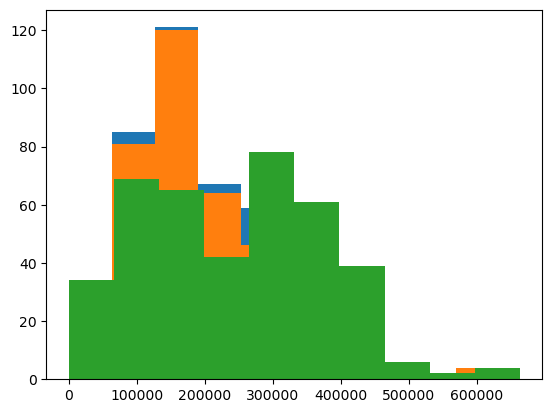

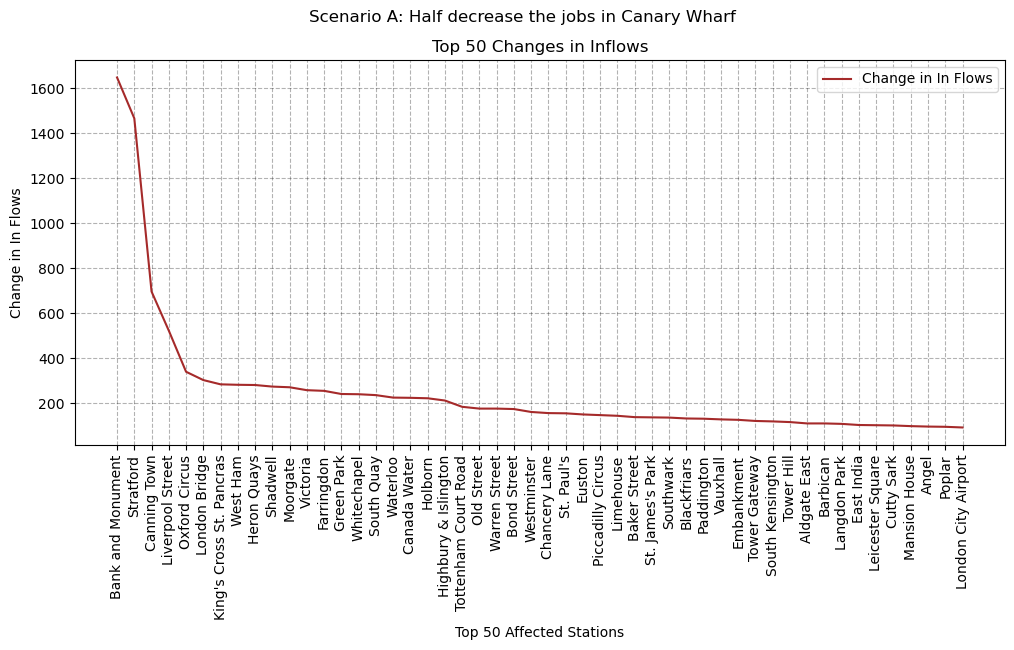

In [157]:
#plot for the SA
fig, ax = plt.subplots(1,1,figsize=(12,5))
fig.suptitle("Scenario A: Half decrease the jobs in Canary Wharf ") #Decrease in Canary Wharf's jobs
ax.plot(list(diff_sa['diff'])[1:], color = "brown", label = 'Change in In Flows') 
ax.grid(color='black', linestyle='--',alpha=0.3) 
ax.set_xlabel("Top 50 Affected Stations") 
ax.set_ylabel("Change in In Flows")  
ax.set_xticks(list(range(50))) 
ax.set_xticklabels(list(diff_sa['station_destination'])[1:], rotation=90)
ax.legend(loc=1)
ax.set_title('Top 50 Changes in Inflows')
plt.show()

## Scenario B

### Beta = 0.00019

In [158]:
dj_gamma = london_flow["jobs"]**gamma
dist_beta1 = np.exp(london_flow["distance"]*(-0.00019))
london_flow["Ai2"] = dj_gamma * dist_beta1
A_i2 = pd.DataFrame(london_flow.groupby(["station_origin"])["Ai2"].agg(np.sum))

In [159]:
A_i2["Ai2"] = 1/A_i2["Ai2"]
A_i2.rename(columns={"Ai2":"A_i2"}, inplace=True)
london_flow = london_flow.merge(A_i2, left_on="station_origin", right_index=True, how="left")

In [160]:
london_flow["prodsimestsb1"] = london_flow["A_i2"]*london_flow["population"]*dj_gamma*dist_beta1
london_flow["prodsimestsb1"] = round(london_flow["prodsimestsb1"])

### Beta = 0.00025

In [161]:
dj_gamma = london_flow["jobs"]**gamma
dist_beta2 = np.exp(london_flow["distance"]*(-0.00025))
london_flow["Ai3"] = dj_gamma * dist_beta2
A_i3 = pd.DataFrame(london_flow.groupby(["station_origin"])["Ai3"].agg(np.sum))
A_i3["Ai3"] = 1/A_i3["Ai3"]
A_i3.rename(columns={"Ai3":"A_i3"}, inplace=True)
london_flow = london_flow.merge(A_i3, left_on="station_origin", right_index=True, how="left")

In [162]:
london_flow["prodsimestsb2"] = london_flow["A_i3"]*london_flow["population"]*dj_gamma*dist_beta2
london_flow["prodsimestsb2"] = round(london_flow["prodsimestsb2"])

In [163]:
london_flow[["prodsimest2", "prodsimestsb1","prodsimestsb2"]]

,prodsimest2,prodsimestsb1,prodsimestsb2
0,78.0,66.0,50.0
1,1.0,1.0,1.0
2,4.0,4.0,4.0
3,99.0,95.0,85.0
4,56.0,59.0,63.0
...,...,...,...
61451,99.0,86.0,66.0
61452,295.0,305.0,313.0
61453,36.0,36.0,35.0
61454,125.0,146.0,183.0


In [164]:
london_flow_sb = london_flow.groupby('station_destination',as_index=False).agg({'prodsimest2':'sum'})
london_flow_sb.sort_values(by=["prodsimest2"],ascending= False, inplace = True)

london_flow_sb1 = london_flow.groupby('station_destination',as_index=False).agg({'prodsimestsb1':'sum'})
london_flow_sb1.sort_values(by=["prodsimestsb1"],ascending= False, inplace = True)

london_flow_sb2 = london_flow.groupby('station_destination',as_index=False).agg({'prodsimestsb2':'sum'})
london_flow_sb2.sort_values(by=["prodsimestsb2"],ascending= False, inplace = True)

In [165]:
london_flow_sbx = london_flow.groupby('station_destination',as_index=False).agg({'jobs':'sum','prodsimest2':'sum','prodsimestsb1':'sum','prodsimestsb2':'sum'})
london_flow_sbx.sort_values(by=["jobs"],ascending= False, inplace = True)

In [166]:
diff_sb1 = london_flow.groupby('station_destination',as_index=False).agg({'jobs':'sum','prodsimest2':'sum','prodsimestsb1':'sum'})
diff_sb1["diff"] = diff_sb1["prodsimestsb1"] - diff_sb1["prodsimest2"]
diff_sb1["diff_abs"]= abs(diff_sb1["diff"])

In [167]:
diff_sb1.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_sb1 = diff_sb1.head(50)

In [168]:
diff_sb2 = london_flow.groupby('station_destination',as_index=False).agg({'prodsimest2':'sum','prodsimestsb2':'sum'})
diff_sb2["diff"]= diff_sb2["prodsimestsb2"] - diff_sb2["prodsimest2"]
#prodsimestsb2
diff_sb2["diff_abs"]= abs(diff_sb2["diff"])

In [169]:
diff_sb2.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_sb2 = diff_sb2.head(50)
diff_sb2

,station_destination,prodsimest2,prodsimestsb2,diff,diff_abs
213,Liverpool Street,58850.0,53158.0,-5692.0,5692.0
327,Stratford,65685.0,62620.0,-3065.0,3065.0
15,Bank and Monument,68383.0,65671.0,-2712.0,2712.0
156,Harrow-on-the-Hill,2627.0,4529.0,1902.0,1902.0
168,Highbury & Islington,29768.0,28099.0,-1669.0,1669.0
253,Paddington,17078.0,15421.0,-1657.0,1657.0
55,Canary Wharf,47691.0,46147.0,-1544.0,1544.0
370,Wembley Park,4124.0,5648.0,1524.0,1524.0
54,Canada Water,25121.0,23702.0,-1419.0,1419.0
281,Romford,3130.0,4519.0,1389.0,1389.0


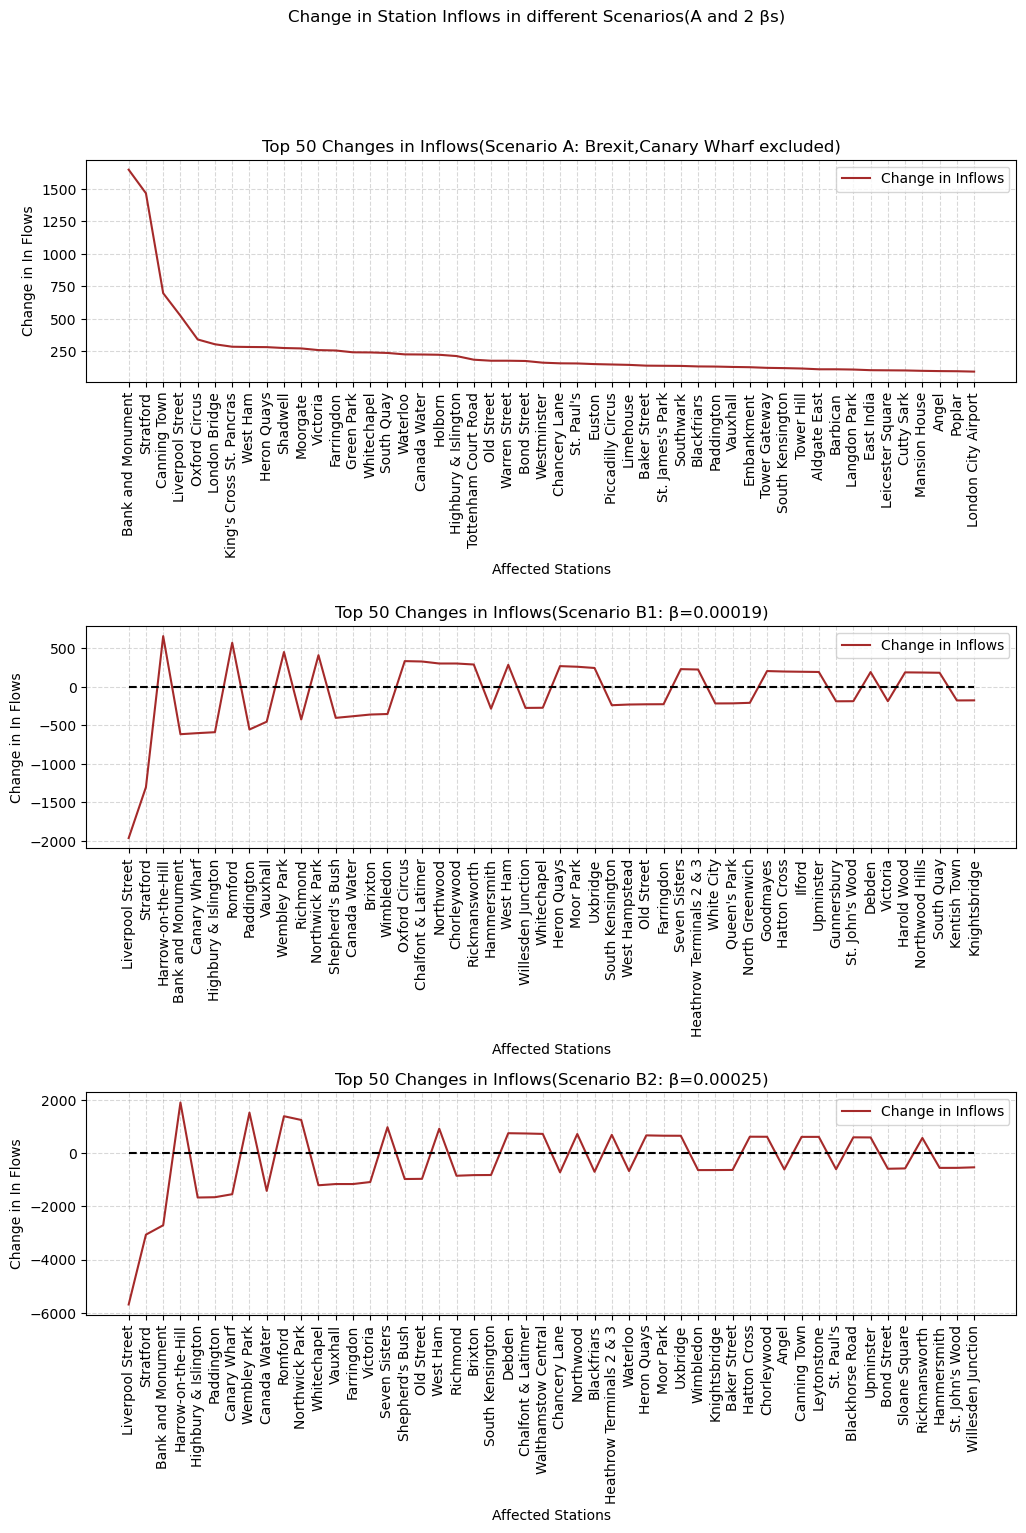

In [170]:
#plot for the SA
fig, ax = plt.subplots(3,1,figsize=(12,15))
fig.suptitle("Change in Station Inflows in different Scenarios(A and 2 βs)") 
# fig.suptitle("Scenario A: Change in Station In Flows after  (Apart from Canary Wharf)") #Decrease in Canary Wharf's jobs

ax[0].plot(list(diff_sa['diff'])[1:], color = "brown", label = 'Change in Inflows') 
ax[0].grid(color='grey', linestyle='--',alpha=0.3) 
ax[0].set_xlabel("Affected Stations") 
ax[0].set_ylabel("Change in In Flows")  
ax[0].set_xticks(list(range(50))) 
ax[0].set_xticklabels(list(diff_sa['station_destination'])[1:], rotation=90)
ax[0].legend(loc=1)
ax[0].set_title('Top 50 Changes in Inflows(Scenario A: Brexit,Canary Wharf excluded)')

ax[1].plot(list(diff_sb1['diff']), color = "brown", label = 'Change in Inflows') 
ax[1].plot([0]*50, color = "black", linestyle='--',linewidth=1.5 ) 
ax[1].grid(color='grey', linestyle='--',alpha=0.3) 
ax[1].set_xlabel("Affected Stations") 
ax[1].set_ylabel("Change in In Flows")  
ax[1].set_xticks(list(range(50))) 
ax[1].set_xticklabels(list(diff_sb1['station_destination']), rotation=90) #[1:]
ax[1].legend(loc=1)
ax[1].set_title('Top 50 Changes in Inflows(Scenario B1: β=0.00019)')


#plot for the Sb2

ax[2].plot(list(diff_sb2['diff']), color = "brown", label = 'Change in Inflows') 
ax[2].plot([0]*50, color = "black", linestyle='--',linewidth=1.5 ) 
ax[2].grid(color='grey', linestyle='--',alpha=0.3) 
ax[2].set_xlabel("Affected Stations") 
ax[2].set_ylabel("Change in In Flows")  
ax[2].set_xticks(list(range(50))) 
ax[2].set_xticklabels(list(diff_sb2['station_destination']), rotation=90) #[1:]
ax[2].legend(loc=1)
ax[2].set_title('Top 50 Changes in Inflows(Scenario B2: β=0.00025)')
fig.subplots_adjust(wspace=0,hspace=1.1)
plt.show()
fig.savefig('Change in station in flows in different scenarios ')